In [1]:
import numpy as np #statistical 
import pandas as pd #data frame numbers . head/tail 
from scipy import stats  
import matplotlib.pyplot as plt 
import seaborn as sns #visualisation graphs and plots
red_wine = pd.read_csv("wine+quality\winequality-red.csv", sep= ';', delimiter=None) 

In [2]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
#show shape 
row, col = red_wine.shape
display(row)
display(col)

1599

12

In [4]:
#show duplicates 
red_wine.duplicated().sum()

240

In [5]:
#make a copy 
rw1 = red_wine

In [6]:
#drop duplicates 
rw1.drop_duplicates(inplace=True)
rw1.duplicated().sum()

0

In [7]:
row, col = rw1.shape
display(row)
display(col)

1359

12

In [8]:
rw1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<function matplotlib.pyplot.show(close=None, block=None)>

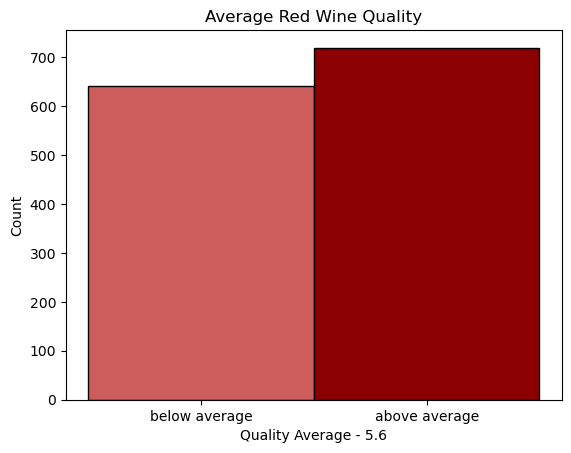

In [9]:
#using 5.6 as the mean
#rounded down from 5.63 
rw1['quality_label'] = rw1['quality'].apply(lambda value: 'below average'
if value <= 5.6 else 'above average')
rw1['quality_label'] = pd.Categorical(rw1['quality_label'], 
categories=['below average', 'above average']) 

h1 = sns.histplot(x = 'quality_label', data= rw1)
h1.patches[0].set_facecolor('indianred')
h1.patches[1].set_facecolor('darkred')
plt.xlabel("Quality Average - 5.6")
plt.ylabel("Count")
plt.title("Average Red Wine Quality")
plt.show 

so this is what we are looking at. what scientific charachteristics put individual samples above the average in this data set. and is there a statistical significance that can be proven and transfered on to a different wine data sample. 

C:\Users\lmyhe\AppData\Local\Temp\ipykernel_18296\3522269113.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_red = rw1.corr().round(2)


<Axes: >

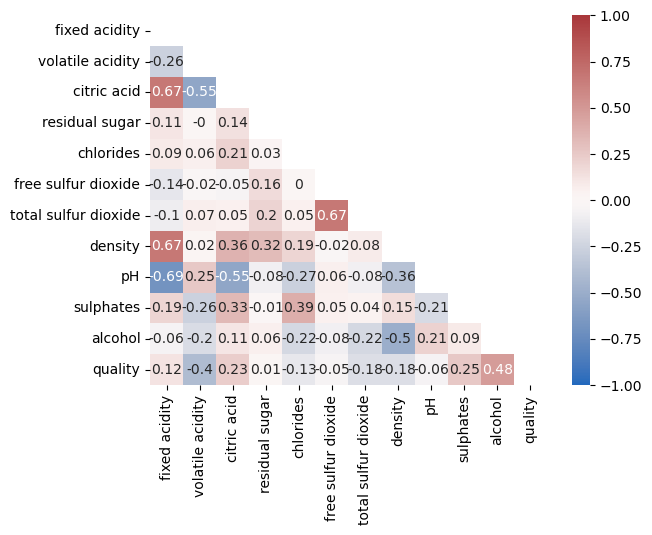

In [10]:
#heatmap to show possible correlations
matrix_red = rw1.corr().round(2)
mask = np.triu(np.ones_like(matrix_red, dtype=bool))
sns.heatmap(matrix_red, annot=True, vmax=1, vmin=-1, cmap='vlag', mask=mask)

Quality for fixed acidity


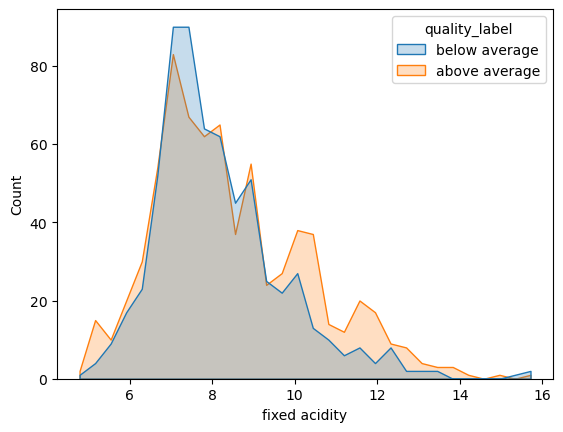

Quality for volatile acidity


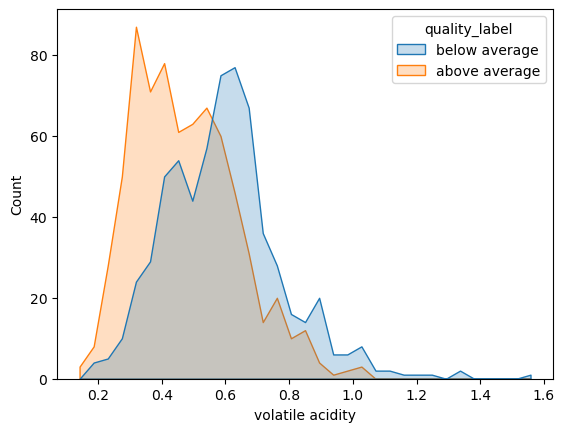

Quality for citric acid


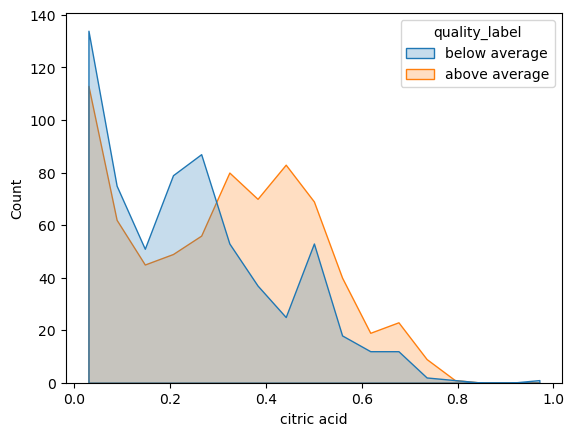

Quality for residual sugar


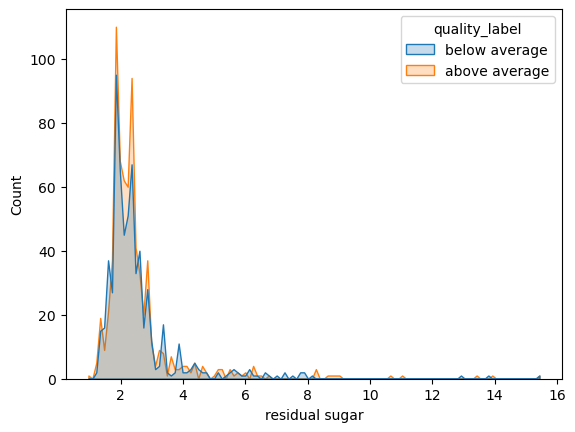

Quality for chlorides


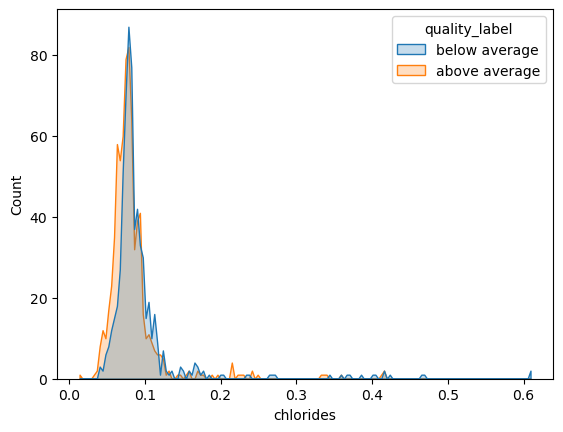

Quality for free sulfur dioxide


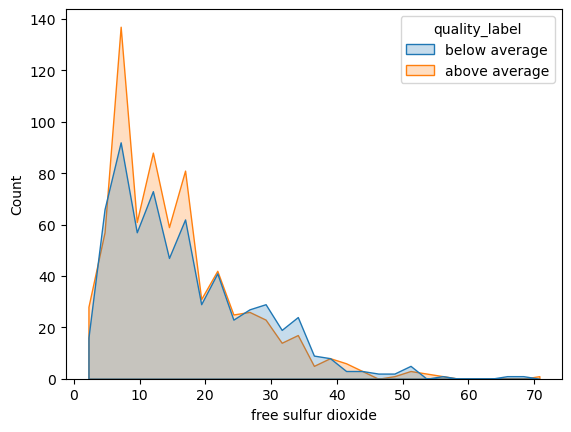

Quality for total sulfur dioxide


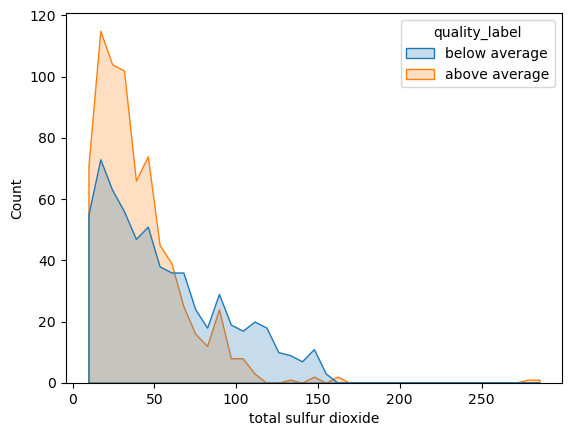

Quality for density


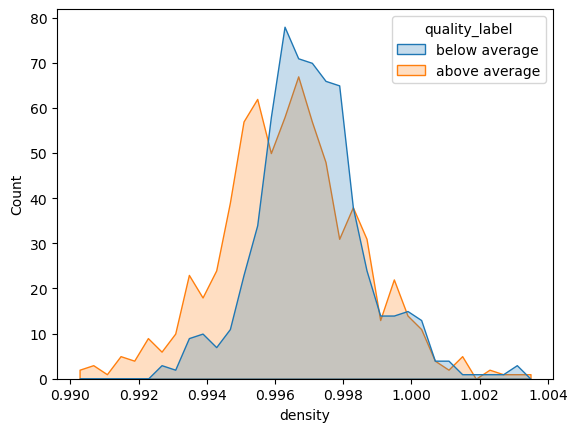

Quality for pH


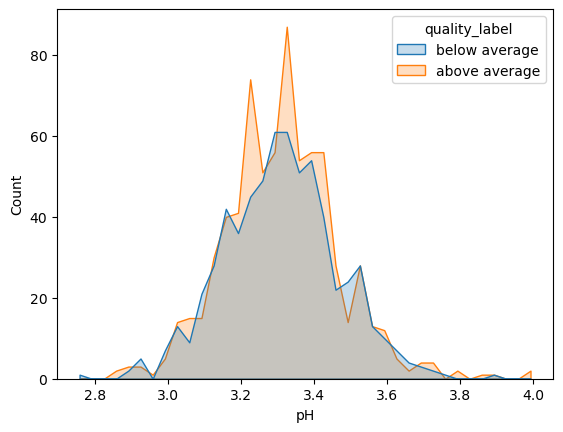

Quality for sulphates


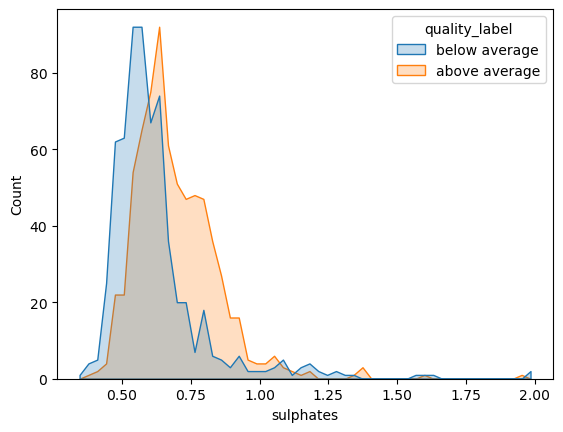

Quality for alcohol


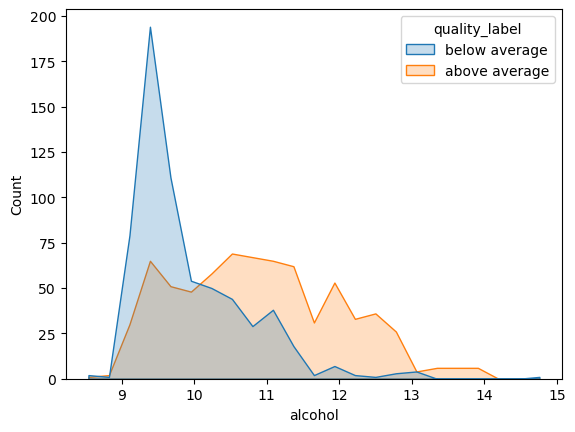

Quality for quality


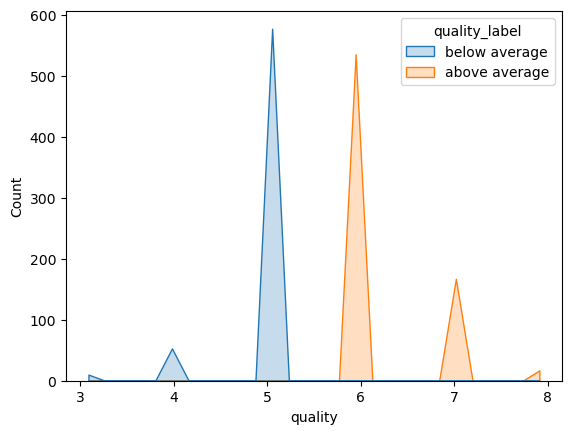

Quality for quality_label


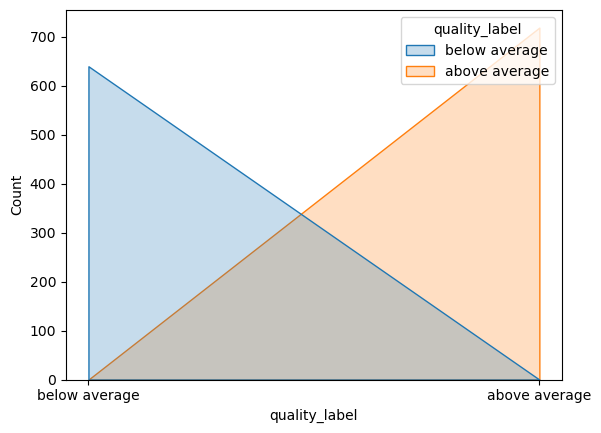

In [11]:
col_list_r = rw1.columns
for columnname in col_list_r:
    print('Quality for', columnname)
    sns.histplot(x = columnname, data= rw1, hue='quality_label', element='poly')

    plt.show()

In [12]:
sns.pairplot(data=rw1)
#vars='density', 'fixed acidity'

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B024AA2EF0> (for post_execute):


KeyboardInterrupt: 

In [13]:
F, p = stats.f_oneway(rw1[rw1['quality_label'] == 'below average']['volatile acidity'],
rw1[rw1['quality_label'] == 'above average']['volatile acidity'])
print('ANOVA test for residual sugar levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for residual sugar levels across wine samples with different quality ratings
F Statistic: 162.6927360325322 	p-value: 2.833106196370536e-35


In [15]:
F, p = stats.f_oneway(rw1[rw1['quality_label'] == 'below average']['sulphates'],
rw1[rw1['quality_label'] == 'above average']['sulphates'])
print('ANOVA test for residual sugar levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for residual sugar levels across wine samples with different quality ratings
F Statistic: 63.45925657603972 	p-value: 3.439153845082636e-15
